<a href="https://colab.research.google.com/github/sgamaa/BAITAP/blob/main/AI_19146009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [25]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/huyet_dao/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 594 images belonging to 7 classes.


In [26]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/huyet_dao/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 168 images belonging to 7 classes.


In [27]:
training_data.class_indices

{'AnDuong': 0,
 'BachHoi': 1,
 'NghinhHuong': 2,
 'SuatCoc': 3,
 'ThaiDuong': 4,
 'ThienTru': 5,
 'ToanTruc': 6}

In [28]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                  

In [29]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [30]:
history=model.fit(training_data,epochs=500,batch_size=100,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
19/19 [==============================] - 148s 8s/step - loss: 2.9029 - accuracy: 0.2576 - val_loss: 1.9937 - val_accuracy: 0.1369
Epoch 2/500
19/19 [==============================] - 7s 342ms/step - loss: 1.8684 - accuracy: 0.2492 - val_loss: 1.8552 - val_accuracy: 0.2619
Epoch 3/500
19/19 [==============================] - 7s 346ms/step - loss: 1.8515 - accuracy: 0.2609 - val_loss: 1.8597 - val_accuracy: 0.2619
Epoch 4/500
19/19 [==============================] - 7s 341ms/step - loss: 1.8443 - accuracy: 0.2761 - val_loss: 1.8638 - val_accuracy: 0.2619
Epoch 5/500
19/19 [==============================] - 7s 346ms/step - loss: 1.8356 - accuracy: 0.2761 - val_loss: 1.8544 - val_accuracy: 0.2619
Epoch 6/500
19/19 [==============================] - 8s 404ms/step - loss: 1.8349 - accuracy: 0.2609 - val_loss: 1.8550 - val_accuracy: 0.2619
Epoch 7/500
19/19 [==============================] - 7s 343ms/step - loss: 1.8351 - accuracy: 0.2761 - val_loss: 1.8513 - val_accuracy: 0.2619


In [31]:
Score=model.evaluate(validation_data,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.8342900276184082
Test accuary 0.863095223903656


<function matplotlib.pyplot.show>

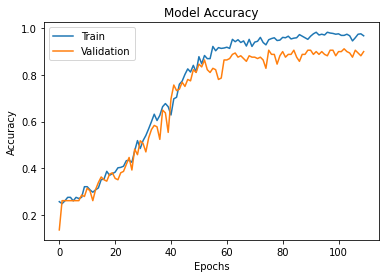

In [32]:
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Validation'])
  plt.show

In [33]:
model.save("/content/drive/MyDrive/projectAI/model.h5")

In [34]:
model_CNN=load_model('/content/drive/MyDrive/projectAI/model.h5')

BachHoi


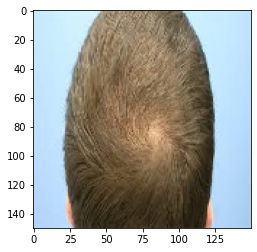

In [36]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/BachHoi/13.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

AnDuong


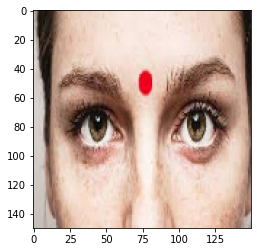

In [37]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/AnDuong/17.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

AnDuong


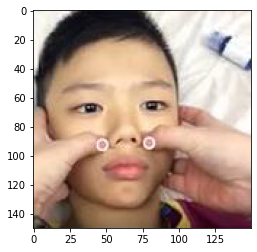

In [38]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/NghinhHuong/rfv.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

BachHoi


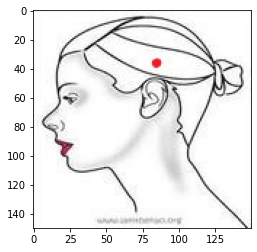

In [39]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/SuatCoc/images.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

ThaiDuong


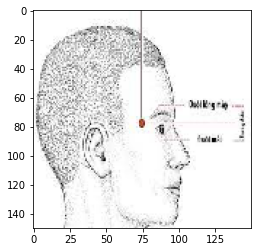

In [40]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/ThaiDuong/1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

ThienTru


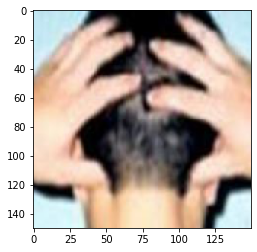

In [41]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/ThienTru/13.JPG',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

ToanTruc


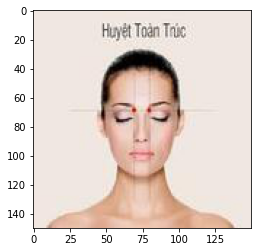

In [42]:
img=load_img('/content/drive/MyDrive/huyet_dao/test/ToanTruc/1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='AnDuong'
elif round(result[0][1])==1:
  prediction='BachHoi'
elif round(result[0][2])==1:
  prediction='NghinhHuong'
elif round(result[0][3])==1:
  prediction='SuatCoc'
elif round(result[0][4])==1:
  prediction='ThaiDuong'
elif round(result[0][5])==1:
  prediction='ThienTru'
elif round(result[0][6])==1:
  prediction='ToanTruc'
print(prediction)

In [43]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [44]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [46]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model Nhận diện tiền
model_file_path = "/content/drive/MyDrive/projectAI/model.h5"
vggmodel = load_model(model_file_path)

classes = ['AnDuong','BachHoi','NghinhHuong','SuatCoc','ThaiDuong','ThienTru','ToanTruc']
while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(150,150))
    tensor = np.expand_dims(frame_p, axis=0)

    # Feed vào mạng
    pred = vggmodel.predict(tensor)
    class_id = np.argmax(pred)
    class_name = classes[class_id]

    # Vẽ lên một ảnh để tẹo nữa overlay

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

/content


<IPython.core.display.Javascript object>